# Basic Statistics Level 2 set 2

# Topics: Normal distribution, Functions of Random Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

## Question 1

In [7]:
mean = 55  #because the work on the car started 10 minutes after the drop-off
# so we gonna take 45+10 as the new mean
std = 8

q1 = stats.norm.sf(60, loc = mean, scale = std)
print('The probability that the service manager cannot meet his commitment is',\
    np.round(q1,5))

The probability that the service manager cannot meet his commitment is 0.26599


## Question 2

In [16]:
mean = 38
std = 6

q2_lessthan_38 = stats.norm.cdf(38, loc = mean, scale = std)

q2_lessthan_44 = stats.norm.cdf(44, loc = mean, scale = std)

q2_between_38_and_44 = (q2_lessthan_44 - q2_lessthan_38)
print('The probability of employee age between 38 and 44 is: ', \
      np.round(q2_between_38_and_44*100,2),'%')

The probability of employee age between 38 and 44 is:  34.13 %


In [17]:
q2_morethan44 = 1 - stats.norm.cdf(44, loc = mean, scale = std)
print('The porbability of employee age more than 44 is: ',\
      np.round(q2_morethan44*100,2),'%')

The porbability of employee age more than 44 is:  15.87 %


In [18]:
answer = (q2_morethan44 > q2_between_38_and_44)
print('Answer: ', answer)

Answer:  False


__(b):__

In [22]:
q2b = stats.norm.cdf(30, loc = mean, scale = std)
print('Training program for the people under the age of 30 at the center is ', \
        'expected to attract: ', np.round(q2b *400,0), 'employees')

Training program for the people under the age of 30 at the center is  expected to attract:  36.0 employees


## Question 3

In [23]:
n = 500
mean = 10
std = 5
x1 = np.random.normal(10, 5, n)
x2 = np.random.normal(10, 5, n)

<Figure size 500x900 with 0 Axes>

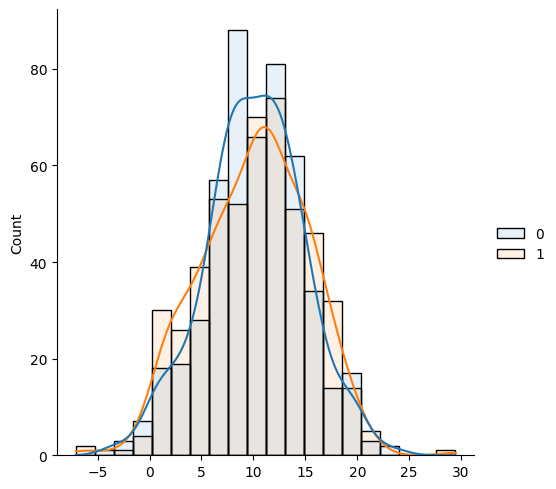

In [78]:
plt.figure(figsize =(5, 9))
sns.displot([x1,x2], kde = True, alpha = 0.1, bins = 20)
plt.show()

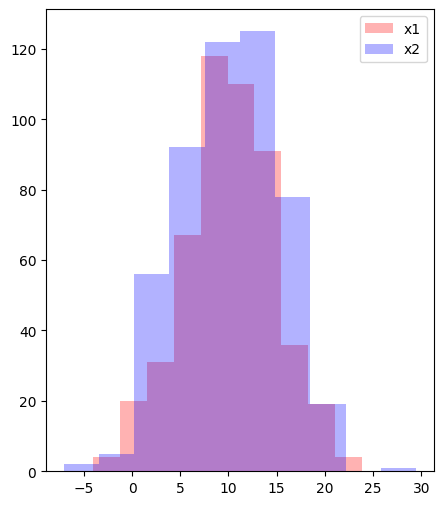

In [82]:
plt.figure(figsize = (5,6))
plt.hist(x1, color = 'red', alpha = 0.3, label = 'x1')
plt.hist(x2, color = 'blue', alpha = 0.3, label = 'x2')
plt.legend()
plt.show()

In [83]:
d1 = x1 + x2
d2 = 2* x1

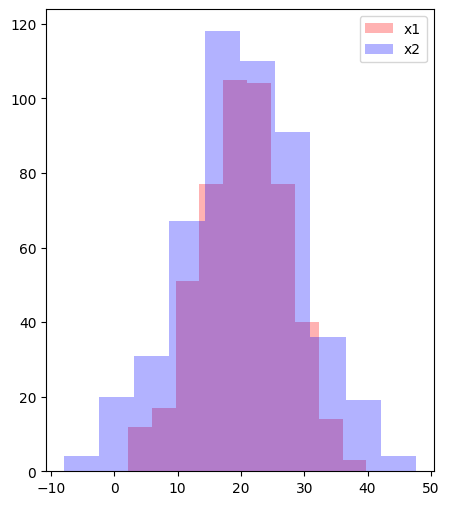

In [84]:
plt.figure(figsize = (5,6))
plt.hist(d1, color = 'red', alpha = 0.3, label = 'x1')
plt.hist(d2, color = 'blue', alpha = 0.3, label = 'x2')
plt.legend()
plt.show()

In [85]:
np.mean(x1)

10.118895335843485

In [89]:
np.std(x1)

4.683993162809812

In [86]:
np.mean(x2)

10.132519048528568

In [93]:
np.std(x2)

5.157778769228245

In [87]:
np.mean(d1)

20.25141438437205

In [91]:
np.std(d1)

6.895639455455983

In [88]:
np.mean(d2)

20.23779067168697

In [92]:
np.std(d2)

9.367986325619624

In [94]:
data_new = d1 - d2

In [96]:
np.mean(data_new)

0.013623712685083604

In [97]:
np.std(data_new)

7.038117934750745

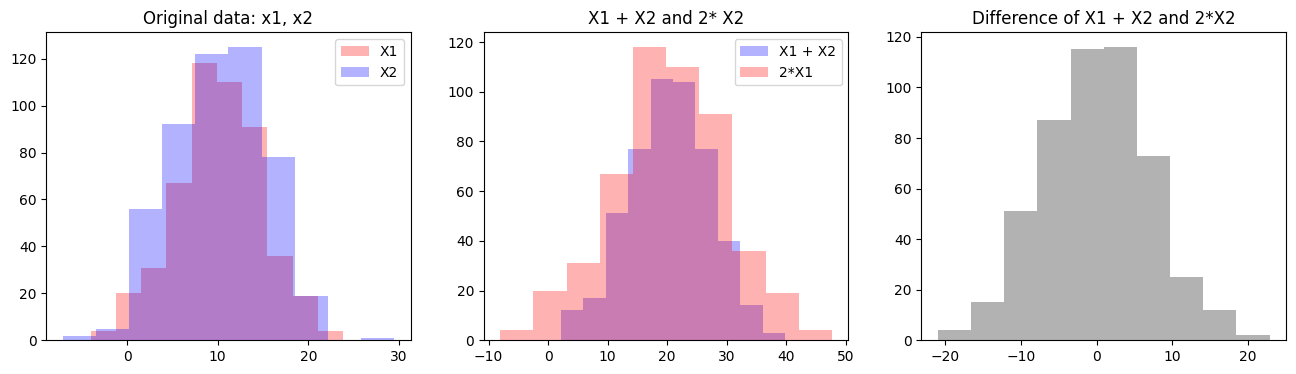

In [120]:
fig, axes = plt.subplots(1,3, figsize = (16,4))
axes[0].hist(x1, alpha = 0.3, color = 'r', label ='X1')
axes[0].hist(x2, alpha = 0.3, color = 'b', label = 'X2')
axes[0].set_title('Original data: x1, x2')
axes[0].legend()
axes[1].hist(d1, alpha = 0.3, color = 'b', label = 'X1 + X2')
axes[1].hist(d2, alpha = 0.3, color = 'r', label = '2*X1')
axes[1].legend()
axes[1].set_title('X1 + X2 and 2* X2')
axes[2].hist(data_new, alpha = 0.3, color = 'k')
axes[2].set_title('Difference of X1 + X2 and 2*X2')
plt.savefig('s2q3.png')
plt.show()

In [128]:
data = pd.DataFrame(data = np.column_stack([x1, x2, d1, d2, data_new]), columns = ['X1', 'X2','X1+ X2', '2 * X2','(X1+ X2) - 2*X1'])

In [130]:
data.head()

,X1,X2,X1+ X2,2 * X2,(X1+ X2) - 2*X1
0,10.205364,12.679417,22.884781,20.410728,2.474053
1,0.141345,18.097424,18.238769,0.282690,17.956079
2,14.683790,3.513549,18.197339,29.367580,-11.170241
3,0.719724,16.843050,17.562774,1.439448,16.123326
4,13.387657,4.221152,17.608809,26.775314,-9.166505


In [131]:
data.describe()

,X1,X2,X1+ X2,2 * X2,(X1+ X2) - 2*X1
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.118895,10.132519,20.251414,20.237791,0.013624
std,4.688684,5.162944,6.902545,9.377368,7.045167
min,-4.010836,-7.092236,2.120218,-8.021673,-20.923947
25%,7.286472,6.428177,15.684806,14.572944,-4.792813
50%,10.314966,10.489880,20.251985,20.629932,0.222081
75%,13.263223,14.057646,25.008847,26.526445,4.804691
max,23.826617,29.453075,39.825199,47.653234,22.824382


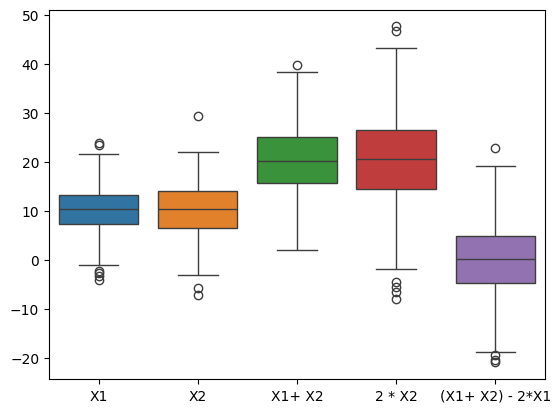

In [135]:
sns.boxplot(data)
plt.savefig('s2q3e.png')
plt.show()

## Question 4

In [144]:
mean = 100
std = 20

z_005 = np.round(stats.norm.ppf(0.005),4)
z_995 = np.round(stats.norm.ppf(0.995),4)

a = np.round((z_005 * std) + mean, 1)
b = np.round((z_995 * std) + mean, 1)

print('Find two values, a and b, symmetric about the mean such that the probability',\
      'of the random variable taking a value between them is 0.99 are:', a, 'and', b) 

Find two values, a and b, symmetric about the mean such that the probability of the random variable taking a value between them is 0.99 are: 48.5 and 151.5


## Question 5

In [150]:
# Combine Mean Profit of both division for Company= mean1 + mean2
mean1 = 5
mean2 = 7
Mean = (mean1+mean2) # 1 USD = 45 rupees
print('The Mean Profit of both division:',Mean, 'Million$')
print('The Mean Profit of both division (in rupees):',(Mean*45)/10, 'Crore Rupees')

# Combine standard Deviation = (Std1^2 + Std2^2)^1/2
std1 = 3**2
std2 = 4**2
Std = np.sqrt(std1 + std2)
print('The Standard Deviation of both division:', Std, 'Million$')
print('The Standard Deviation of both division (in rupees):', (Std*45)/10, 'Crore Rupees')

The Mean Profit of both division: 12 Million$
The Mean Profit of both division (in rupees): 54.0 Crore Rupees
The Standard Deviation of both division: 5.0 Million$
The Standard Deviation of both division (in rupees): 22.5 Crore Rupees


In [151]:
r1, r2 = np.round(stats.norm.interval(0.95, Mean, Std),2)
print('Rupee Ranges from',r1,'to',r2,'Million$ in Annual profit of the Company',\
      '95% of the time')
print('Rupee Ranges from',np.round(np.divide(np.multiply(r1,45),10),2),'to',\
      np.divide(np.multiply(r2,45),10),'Crore Rupees in Annual profit of the Company'\
      ' 95% of the time')

Rupee Ranges from 2.2 to 21.8 Million$ in Annual profit of the Company 95% of the time
Rupee Ranges from 9.9 to 98.1 Crore Rupees in Annual profit of the Company 95% of the time


__(b):__

In [153]:
Z_05_ = stats.norm.ppf(0.05)
Fifth_percentile = (Z_05_ * Std) + Mean
print('The 5th percentile of Profit for the company is',
      np.round(Fifth_percentile,2),'Million$')
print('The 5th percentile of Profit for the company is', 
      np.round((Fifth_percentile*45)/10,),'Crore Rupees')

The 5th percentile of Profit for the company is 3.78 Million$
The 5th percentile of Profit for the company is 17.0 Crore Rupees


__(c):__

In [155]:
# The probability of Division #1 making a loss
print('The Probability of Division #1 making a loss is',
      np.round((stats.norm.cdf(0,5,3))*100,2),'%')

# The probability of Division #2 making a loss
print('The Probability of Division #2 making a loss is',
      np.round((stats.norm.cdf(0,7,4))*100,2),'%')

Division_1 = (stats.norm.cdf(0,5,3))*100
Division_2 = (stats.norm.cdf(0,7,4))*100

if Division_1>Division_2:
    print('The Division 1 has a larger Probability of making a loss')
else:
          print('The Division 2 has a larger Porbability of making a loss')

The Probability of Division #1 making a loss is 4.78 %
The Probability of Division #2 making a loss is 4.01 %
The Division 1 has a larger Probability of making a loss
